In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df=pd.read_excel("random_forest_dataset.xlsx")

In [3]:
df.isnull().sum()

Sl No    0
USN      0
Name     0
Title    1
P1       0
C1       0
P2       0
C2       0
P3       0
C3       0
R1       0
T1       0
P3T      0
Total    0
Grade    0
dtype: int64

In [4]:
df

,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
0,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85.0,34.0,93,18.6,13,4,35.6,85.2,A
1,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A
2,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82.0,32.8,88,17.6,13,1,31.6,81.2,A
3,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85.0,34.0,96,19.2,13,4,36.2,87.8,A
4,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82.0,32.8,77,15.4,15,5,35.4,85.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,114,1RV21MC119,Y S KIRAN KUMAR,Text Summarization Using NLP,92,18.4,90.0,36.0,94,18.8,13,4,35.8,90.2,S
113,115,1RV21MC120,YATHISH L,Immersive Virtual Reality walkthrough of MCA D...,100,20.0,100.0,40.0,100,20.0,15,5,40.0,100.0,S
114,116,1RV20MC031,KAVITHA M,IoT - Gateway dashboard for Greenhouse Automat...,87,17.4,92.0,36.8,92,18.4,14,5,37.4,91.6,S
115,117,1RD19MCA38,VIVEK KUMAR,Face Attendance System With Real Time Database,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,F


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sl No   117 non-null    int64  
 1   USN     117 non-null    object 
 2   Name    117 non-null    object 
 3   Title   116 non-null    object 
 4   P1      117 non-null    int64  
 5   C1      117 non-null    float64
 6   P2      117 non-null    float64
 7   C2      117 non-null    float64
 8   P3      117 non-null    int64  
 9   C3      117 non-null    float64
 10  R1      117 non-null    int64  
 11  T1      117 non-null    int64  
 12  P3T     117 non-null    float64
 13  Total   117 non-null    float64
 14  Grade   117 non-null    object 
dtypes: float64(6), int64(5), object(4)
memory usage: 13.8+ KB


In [6]:
x=df.drop(["Sl No","USN","Name","Title","Grade"],axis=1)
y=df["Grade"]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

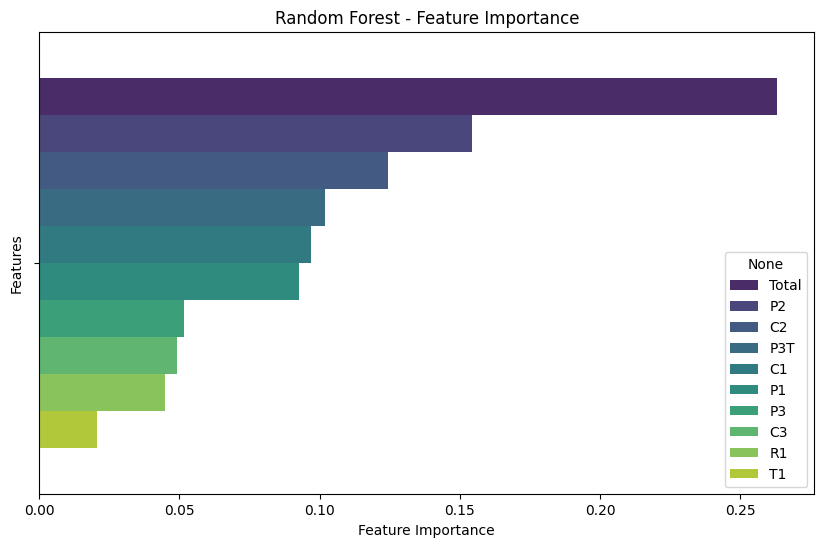

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=x.columns)
sorted_features = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features, hue=sorted_features.index, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance')
plt.show()


In [27]:
# Tuning the Random Forest using GridSearchCV (example parameters, you can modify them)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)
# print(grid_search)
# Get the best parameters after tuning
best_params = grid_search.best_params_
print(best_params)
# Implementing the best Random Forest model
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(x_train, y_train)

# Predictions
y_pred = best_rf.predict(x_test)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, min

In [30]:
# Analyze the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the output
print("Best Parameters after Tuning: ", best_params)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(report)

Best Parameters after Tuning:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 95.83%
Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.91      0.95        11
           B       1.00      1.00      1.00         2
           F       1.00      1.00      1.00         3
           S       0.89      1.00      0.94         8

    accuracy                           0.96        24
   macro avg       0.97      0.98      0.97        24
weighted avg       0.96      0.96      0.96        24



In [9]:
param_grid={'n_estimators':[100,200,300],'max_depth':[None,10,20],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}

In [11]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)

In [12]:
grid_search.fit(x_train,y_train)

/home/skanda/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [13]:
best_params=grid_search.best_params_

In [14]:
best_params

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [15]:
rf_classifier=RandomForestClassifier(**best_params,random_state=42)

In [16]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=4, random_state=42)

In [17]:
feature_importances=rf_classifier.feature_importances_

In [18]:
y_pred=rf_classifier.predict(x_test)

In [19]:
y_pred

array(['A', 'A', 'A', 'B', 'A', 'S', 'S', 'A', 'A', 'A', 'A', 'S', 'B',
       'S', 'F', 'A', 'S', 'S', 'S', 'S', 'S', 'F', 'F', 'A'],
      dtype=object)

In [20]:
cm=confusion_matrix(y_test,y_pred)

In [25]:
a=accuracy_score(y_test,y_pred)
a

0.9583333333333334